In [1]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/sgupta/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/sgupta/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
# import sys
# sys.path.append("/Users/sudhanshugupta/Library/Python/3.9/lib/python/site-packages")

In [3]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from EDA import EDA_movie_reviews
from preprocessing import preprocMovieReview, Vectorizer, train_val_test_split_movie_reviews
from classification import LogisticRegressionClassifier, BiLSTMClassifierWrapper

# Read Data

In [7]:
df_movie_reviews = pd.read_csv("./data/movie_review_train.tsv", delimiter="\t")
df_movie_reviews.sample(10)

,id,sentiment,review
9787,1069_3,0,I saw this movie at the AFI Dallas festival. M...
24371,2942_1,0,This is hands down the worst movie of all time...
18729,12254_2,0,"Some might scoff, but there is actually a real..."
16722,6228_7,1,"Another fun, witty, frothy RKO musical with As..."
23166,4105_1,0,Another too bad the lowest they can go here is...
19727,2223_8,1,A movie you start watching as a late night cab...
15851,1732_10,1,"\Sandra, the Making of a Woman\"" is a standout..."
23162,5598_4,0,Saw it at the Philadelphia Gay and Lesbian Fil...
22913,4067_1,0,"Am I wrong,or is the 2007 version just a rip-o..."
2558,3841_1,0,"Roeg has done some great movies, but this a tu..."


## Basic Text Preprocessing

In [8]:
text_preprocessor = preprocMovieReview(df_movie_reviews['review'])
df_movie_reviews['review_clean'] = text_preprocessor.basic_text_sanitization_pipeline()

/home/sgupta/algorithms/cluepoints-case/preprocessing.py:47: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  html_parser = BeautifulSoup(review_text, "html.parser")


# Exploratory Data Analysis

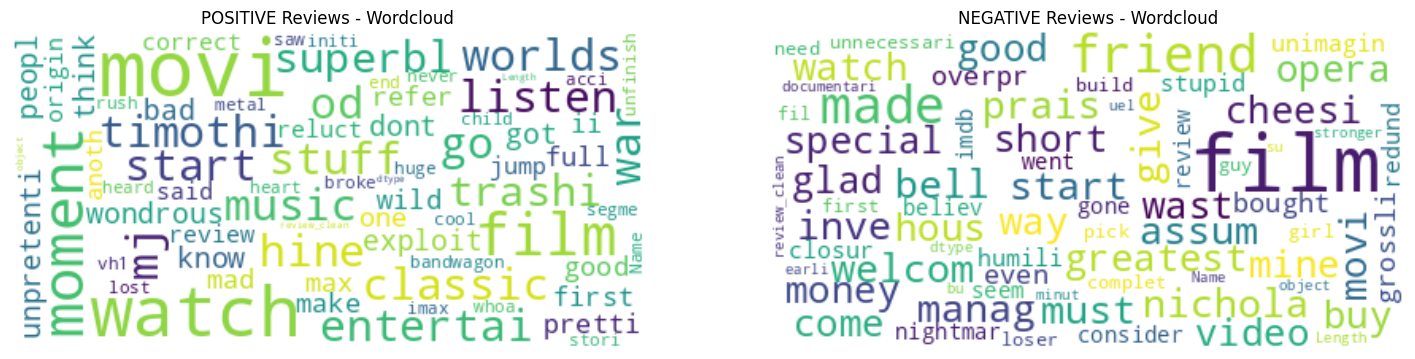

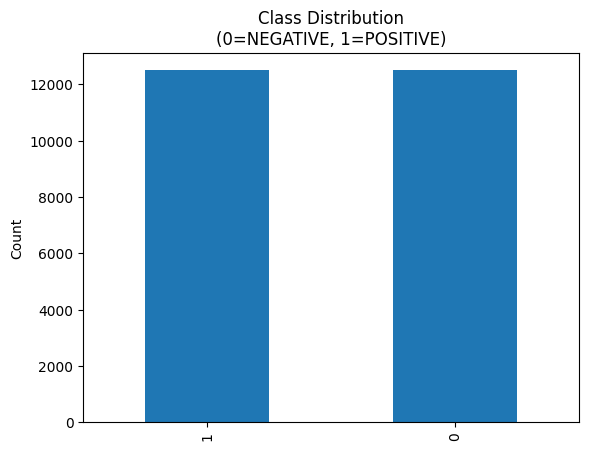

Statistics on count of tokens per POSITIVE movie review


count    12500.000000
mean       124.710960
std         97.135333
min          7.000000
25%         64.000000
50%         91.000000
75%        153.000000
max       1431.000000
Name: n_tokens, dtype: float64

Statistics on count of tokens per NEGATIVE movie review


count    12500.000000
mean       119.888880
std         88.148829
min          4.000000
25%         65.000000
50%         90.000000
75%        145.000000
max        836.000000
Name: n_tokens, dtype: float64

most common 5-grams for POSITIVE:
[(('one', 'best', 'movi', 'ever', 'seen'), 18), (('vote', 'eight', 'titl', 'brazil', '\\'), 12), (('vote', 'seven', 'titl', 'brazil', '\\'), 11), (('lion', 'king', '1', '1', '2'), 11), (('went', 'bought', 'case', 'cognac', 'went'), 11), (('bought', 'case', 'cognac', 'went', 'bought'), 11), (('case', 'cognac', 'went', 'bought', 'case'), 11), (('cognac', 'went', 'bought', 'case', 'cognac'), 11), (('\\', 'der', 'student', 'von', 'prag\\'), 10), (('dr', 'jacqu', 'coulardeau', 'univers', 'pari'), 9)]
most common 5-grams for NEGATIVE:
[(('one', 'worst', 'movi', 'ever', 'seen'), 76), (('one', 'worst', 'film', 'ever', 'seen'), 34), (('one', 'worst', 'movi', 'ever', 'made'), 24), (('worst', 'movi', 'ever', 'seen', 'life'), 13), (('one', 'worst', 'film', 'ever', 'made'), 12), (('\\', 'accord', 'dvd', 'sleev', 'synopsi'), 12), (('movi', 'ever', 'seen', 'entir', 'life'), 9), (('hour', 'life', 'never', 'get', 'back'), 9), (('minut', 'life', 'never', 'get', 'back'),

In [9]:
eda = EDA_movie_reviews(df_movie_reviews, reviews_col='review_clean', target_col='sentiment')
eda.visualize_wordcloud()
eda.visulaize_class_distribution()
eda.statistics_on_review_text()
eda.show_common_n_grams(n=5, show_count=10)

In [15]:
X_train, y_train, X_test, y_test, X_val, y_val = train_val_test_split_movie_reviews(df_movie_reviews, reviews_col='review_clean', target_col='sentiment', test_percent=20, val_percent=0)
# print(f"{X_train.shape=}, {y_train.shape=}, {X_test.shape=}, {y_test.shape=}, {X_val.shape=}, {y_val.shape=}")

# Establish Baseline: TFIDF Vectorizer + Basic Classifier

In [16]:
tfidf_vectorizer = Vectorizer(vectorizer_type='tfidf')
X_train = tfidf_vectorizer.apply_transform_train(X_train)
X_test = tfidf_vectorizer.apply_transform_test(X_test)

print(X_train.shape, X_test.shape)

(20000, 10000) (5000, 10000)


In [18]:
clf_logistic_regression = LogisticRegressionClassifier()
clf_logistic_regression.fit_classifier(X_train, y_train)
y_pred = clf_logistic_regression.predict_classifier(X_test)
clf_logistic_regression.evaluate_classifier(y_test, y_pred)

0.8850529619458611
0.9038461538461539
0.8943508424182359
0.8934


# Improved Classifier: TFIDF Vectorizer + BiLSTM

In [49]:
# Example usage
input_size = X_train.shape[1]
hidden_size = 16
output_size = 2
num_epochs = 10
batch_size = 8
lr_init = 1e-3

clf_bilstm = BiLSTMClassifierWrapper(input_size, hidden_size, output_size, batch_size, num_epochs, lr_init)
clf_bilstm.fit_classifier(X_train, y_train)
y_pred = clf_bilstm.predict_classifier(X_test)
clf_bilstm.evaluate_classifier(y_test, y_pred)

torch.Size([8, 10000]) torch.Size([8])
torch.Size([8, 10000])
torch.Size([1, 16]) tensor([[-0.1071,  0.0367, -0.0139,  0.1024, -0.1258,  0.0393,  0.0421,  0.0902,
          0.0523,  0.0108,  0.1332,  0.0765,  0.1283,  0.0079, -0.1293,  0.1190]],
       grad_fn=<SqueezeBackward1>)
tensor([[-0.1450,  0.0138]], grad_fn=<AddmmBackward0>) tensor([0, 0, 1, 1, 0, 0, 1, 1])


ValueError: Expected input batch_size (1) to match target batch_size (8).

# Improved Embeddings: Glove + BiLSTM

# Transformer Based: BERT

# Error Analysis